## Section 2: Coding Questions

This section consists of coding questions. The total mark for this section is **85**.
The task we are considering in this section is the text classification task. In this section, some code has been provided to help you get started. For each cell marked with **# Insert your code here**, these are placeholders where you **must** supply your own codes when instructed.
This section consists of 5 parts:
* Part 0: Downloading and preprocessing data. This part has been completed. No marks are allocated for this part.
* Part 1: Coding assessment on using Word2Vect to transform texts to vectors (20 marks).
* Part 2: Coding assessment on Text CNN for sequence modeling and neural embedding (10 marks).
* Part 3: Coding assessment on RNNs for sequence modeling and neural embedding (32 marks).
* Part 4: Coding assessment on Transformer for sequence modeling and neural embedding and the overall ranking (23 marks).

## <span style="color:#0b486b">Set random seeds</span>

We start with importing tensorflow and numpy and setting random seeds for TF and numpy. You can use any seeds you prefer.

In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(6789)
np.random.seed(6789)

## <span style="color:#0b486b">Part 0: Download and preprocess the data</span>

<div style="text-align: right"><span style="color:red; font-weight:bold"><span></div>

The dataset we use for this assignment is a question classification dataset for which the training set consists of $5,500$ questions belonging to 6 coarse question categories including:
- abbreviation (ABBR),
- entity (ENTY),
- description (DESC),
- human (HUM),
- location (LOC) and
- numeric (NUM).

In this assignment, we will utilize a subset of this dataset, containing $2,000$ questions for training and validation. We will use 80% of those 2000 questions for trainning and the rest for validation.


Preprocessing data is a crucial initial step in any machine learning or deep learning project. The *TextDataManager* class simplifies the process by providing functionalities to download and preprocess data specifically designed for the subsequent questions in this assignment. It is highly recommended to gain a comprehensive understanding of the class's functionality by **carefully reading** the content provided in the *TextDataManager.py* file before proceeding to answer the questions in Part 1.

In [2]:
from TextDataManager import SimpleTextDataset as DataManager

print('Loading data...')
DataManager.maybe_download("data", "train_2000.label", "http://cogcomp.org/Data/QA/QC/")

dm = DataManager(maxlen=100)
dm.read_data("data/", ["train_2000.label"])

Loading data...
Downloaded successfully train_2000.label

Sample questions and corresponding labels... 

['manner how did serfdom develop in and then leave russia ?', 'cremat what films featured the character popeye doyle ?', "manner how can i find a list of celebrities ' real names ?", 'animal what fowl grabs the spotlight after the chinese year of the monkey ?', 'exp what is the full form of .com ?']
['DESC', 'ENTY', 'DESC', 'ENTY', 'ABBR']


In [8]:
dm.manipulate_data()
dm.train_valid_split(train_ratio=0.8)

In [23]:
#print(dm.train_str_questions).  #1600
#print(dm.train_numeral_data.shape).   #(1600,100)
#print(dm.valid_numeral_data.shape).  #(400,100)
#print(dm.train_numeral_labels.shape).    #(1600,)

In [27]:
#print(len(dm.train_str_questions))

In [24]:
#print(dm.train_numeral_data)#looks like each word corresponds to a unique number

In [25]:
#print(dm.train_numeral_labels)
#print(dm.train_numeral_data)


You now have a data manager, named *dm* containing the training and validiation sets in both text and numeric forms. Your task is to play around and read this code to figure out the meanings of some important attributes that will be used in the next parts.

## <span style="color:#0b486b">Part 1: Using Word2Vect to transform texts to vectors </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 20 marks]<span></div>

In this part, you will be assessed on how to use a pretrained Word2Vect model for realizing a machine learning task. Basically, you will use this pretrained Word2Vect to transform the questions in the above dataset stored in the *data manager object dm* to numeric form for training a classifier using Logistic Regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [15]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

#### <span style="color:red">**Question 1.1**</span>
**Write code to download the pretrained model *glove-wiki-gigaword-100*. Note that this model transforms a word in its dictionary to a $100$ dimensional vector.**

**Write code for the function *get_word_vector(word, model)* used to transform a word to a vector using the pretrained Word2Vect model *model*. Note that for a word not in the vocabulary of our *word2vect*, you need to return a vector $0$ with 100 dimensions.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [38]:
# Insert your code here
word2vect = api.load("glove-wiki-gigaword-100")#load the model

In [39]:
import numpy as np
def get_word_vector(word, model):
    try:
        vector = model[word]
    except KeyError:
        vector = np.zeros(100)
    return vector

In [28]:
##test
#word1 = "computer"
#vector1 = get_word_vector(word1,word2vect)
#print(vector1)

#### <span style="color:red">**Question 1.2**</span>

**Write the code for the function `get_sentence_vector(sentence, important_score=None, model= None)`. Note that this function will transform a sentence to a 100-dimensional vector using the pretrained model *model*. In addition, the list *important_score* which has the same length as the *sentence* specifies the important scores of the words in the sentence. In your code, you first need to apply *softmax* function over *important_score* to obtain the important weight *important_weight* which forms a probability over the words of the sentence. Furthermore, the final vector of the sentence will be weighted sum of the individual vectors for words and the weights in *important_weight*.**
- $important\_weight = softmax(important\_score)$.
- $final\_vector= important\_weight[1]\times v[1] + important\_weight[2]\times v[2] + ...+ important\_weight[T]\times v[T]$ where $T$ is the length of the sentence and $v[i]$ is the vector representation of the $i-th$  word in this sentence.

**Note that if `important_score=None` is set by default, your function should return the average of all representation vectors corresponding to set `important_score=[1,1,...,1]`.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [40]:
from numpy import exp
# softmax function
def softmax(vector):
  e = exp(vector)
  return e / e.sum()

print(softmax([1,2,3]))#a test

[0.09003057 0.24472847 0.66524096]


In [41]:
def get_sentence_vector(sentence, important_score=None, model=None):
    # Insert your code here

    words = sentence.split()#split the sentence

    #if important_score is None, initialize it with all 1
    if important_score is None:
        important_score = [1] * len(words)


    if len(words) != len(important_score):#make sure list important_score has same length with sentence
        raise ValueError("Length of sentence and important_score do not match.")


    important_weight = softmax(important_score)


    sentence_vector = np.zeros(100)#initialize sentence_vector
    for i, word in enumerate(words):
        word_vector = get_word_vector(word, model)#get the word_vector for each word in sentence
        sentence_vector += important_weight[i] * word_vector

    return sentence_vector

In [29]:
##test
#sentence1 = 'manner how did serfdom develop in and then leave russia ?'
#vector1 = get_sentence_vector(sentence1,model=word2vect)

In [30]:
#print(vector1)

#### <span style="color:red">**Question 1.3**</span>

**Write code to transform questions in *dm.train_str_questions* and *dm.valid_str_questions* to feature vectors. Note that after running the following cells, you must have $X\_train$ and $X\_valid$ which are two numpy arrays of the feature vectors and $y\_train$ and $y\_valid$ which are two arrays of numeric labels (Hint: *dm.train_numeral_labels* and *dm.valid_numeral_labels*). You can add more lines to the following cells if necessary. In addition, you should decide the *important_score* by yourself. For example, you might reckon that the 1st score is 1, the 2nd score is decayed by 0.9, the 3rd is decayed by 0.9, and so on.**

<div style="text-align: right"><span style="color:red">[4 marks]</span></div>

In [42]:
def get_importance_score(sentence, factor=0.9):#generate important_score list in this situation 1, 0.9,0.81 ...
  num_words = len(sentence.split())
  importance_scores = [factor**i for i in range(num_words)]
  return importance_scores

In [31]:
###test
#print(len(dm.train_str_questions[1]))
#score = get_importance_score(dm.train_str_questions[1])
#print(score)

In [43]:
print("Transform training set to feature vectors...")
dm.train_str_questions
X_train = np.array([get_sentence_vector(question, get_importance_score(question), word2vect)
                    for question in dm.train_str_questions])#transform train str to feature vector


Transform training set to feature vectors...


In [33]:
#print(len(X_train))

In [44]:
y_train = np.array(dm.train_numeral_labels)

In [32]:
#print(y_train)

In [45]:
print("Transform validation set to feature vectors...")
X_valid = np.array([get_sentence_vector(question, get_importance_score(question), word2vect)
                    for question in dm.valid_str_questions])#transform valid str to feature vector

y_valid = np.array(dm.valid_numeral_labels)

Transform validation set to feature vectors...


In [34]:
#print(X_train)
#print(X_valid)

#### <span style="color:red">**Question 1.4**</span>

**It is now to use *MinMaxScaler(feature_range=(-1,1))* in scikit-learn to scale both training and validation sets to the range $(-1,1)$.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)#transform to (-1,1) range
scaler.fit(X_valid)
X_valid_scaled = scaler.transform(X_valid)#transform to (-1,1) range

In [35]:
#print(X_train_scaled)
#print(X_valid_scaled)

#### <span style="color:red">**Question 1.5**</span>
**Train a Logistic Regression model on the training set and then evaluate on the validation set.**
<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
# Insert your code for training here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_1_5 = LogisticRegression(max_iter=1000)

model_1_5.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Insert your code for validation here
y_pred = model_1_5.predict(X_valid_scaled)

accuracy = accuracy_score(y_valid, y_pred)#calculate accuracy
print(f"Accuracy on validation set: {accuracy:.4f}")


report = classification_report(y_valid, y_pred)
print("\nClassification Report:\n", report)

Accuracy on validation set: 0.8650

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.95      0.92      0.94        87
           2       0.77      0.83      0.80        99
           3       1.00      0.87      0.93        85
           4       0.75      0.92      0.83        60
           5       0.89      0.81      0.85        63

    accuracy                           0.86       400
   macro avg       0.86      0.84      0.84       400
weighted avg       0.88      0.86      0.87       400



### **Embedding visualization**

**As you know, the embedding matrix is a collection of embedding vectors, each is for one word. In this part, you will base on the cosine similarity of the embedding vectors for the words to find the top-k most relevant words for a given word.**

**Good embeddings should have words close in meaning near each other by some similarity metrics. The similarity metric we'll use is the `consine` similarity, which is defined for two vector $\mathbf{u}$ and $\mathbf{v}$ as $\cos(\mathbf{u}, \mathbf{v})=\frac{\mathbf{u} \cdot \mathbf{v}}{\left\Vert{\mathbf{u}}\right\Vert\left\Vert{\mathbf{v}}\right\Vert}$ where $\cdot$ means dot product and $\left\Vert\cdot\right\Vert$ means the $L^2$ norm.**

In [47]:
def cosine_similarity(u,v):
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

#### <span style="color:red">**Question 1.6** </span>

**Write code for the `function find_most_similar(word=None, k=5, model=None)` which returns a list of the top-`k` most similar words (in descending order) for a given word. This similarity is based on the cosine similarity of embedding vectors obtained from the pretrained model `glove-wiki-gigaword-100` (see Question 1.1). The parameter `include_cur_word` specifies whether the given word should be included in the returned output or not. This means that if `include_cur_word=True`, the function will return `k+1` words.**

<div style="text-align: right"><span style="color:red">[3 marks]</span></div>

In [48]:
def find_most_similar(word=None, k=5, model=None, include_cur_word=False):
    try:
        word_vector = model[word]


        similarities = {}#initialize a similarities list
        for vocab_word in model.key_to_index.keys():
            if vocab_word == word and not include_cur_word:
                continue
            vocab_word_vector = model[vocab_word]
            cosine_sim = cosine_similarity(word_vector, vocab_word_vector)#find cos similarity
            similarities[vocab_word] = cosine_sim

        #the top k words
        sorted_words = sorted(similarities, key=similarities.get, reverse=True)


        return sorted_words[:k + (1 if include_cur_word else 0)]#return the top k, k+1 if include_cur_word is true
    except: # Word not in the vocabulary
        print("Word is not in the dictionary!")

Here is the example of the above function. You can check your implementation using the provided `result`. As you can observe, the `result` makes sense which demonstrates that the embedding matrix is meaningful.

In [49]:
result = ['computer','computers','software','technology','pc','hardware','internet','desktop','electronic','systems','computing']
output = find_most_similar(word='computer', k=10, model=word2vect, include_cur_word=True)
if output == result:
    print("Your implementation is correct.")
else:
    print("Your implementation is not correct.")

Your implementation is correct.


In [ ]:
###test
#if 'computer' in word2vect.key_to_index.keys():
#    print("'computer' is in the vocabulary.")
#else:
#   print("'computer' is NOT in the vocabulary.")


#print(word2vect.key_to_index)

'computer' is in the vocabulary.


#### <span style="color:red">**Question 1.7** </span>
**Implement the `plot2D_with_groups(word_list, model, k=10)` function to visualize groups of similar words in 2D space. The `word_list` parameter is a list of words, and for each word in the `word_list`, find its top-`k` most similar words (which forms a group) using the `find_most_similar` function. Use tSNE to project embedding vectors into 2D space and plot groups with different colors. You can use the colormaps from `matplotlib`, i.e., `cmap = plt.get_cmap('brg')`.**

**The figure bellow is the output obtained by running `plot2D_with_groups` using the input `word_list=['an', 'introduction', 'to', 'deep', 'learning']`. Note that the words within the `word_list` are also visualized (in black) as shown in the figure.**

<img src="./images/2Dtsne.png" align="center" width=600/>

**As you can observe, words within each group tend to be closer to each other, while words from different groups are more distant.**

<div style="text-align: right"><span style="color:red">[5 marks]</span></div>

In [50]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
def plot2D_with_groups(word_list=None, k=10, model=None):
  neighbour_words = []#contains similar words for each word in word_list
  neighbour_vectors = []#contains vector form of similar words for each word in word_list


  for word in word_list:
    similar_words = find_most_similar(word, k, model,include_cur_word=True)#find top k similar words
    neighbour_words.extend(similar_words)
    neighbour_vectors.extend([model[w] for w in similar_words])#convert to vector form and save

  #convert to 2d dimension
  d2_embedding=tsne.fit_transform(np.array(neighbour_vectors))
  #print(d2_embedding)
  #print(len(d2_embedding))

  plt.figure(figsize=(12, 8))
  cmap = plt.get_cmap('tab10')
  num_groups = len(word_list)

  for i,word in enumerate(word_list):
    start = i*(k+1) #k neighbour + word itself
    end = start +k +1
    #print(start,end)

    #plot word scatters for each group
    plt.scatter(d2_embedding[start:end, 0], d2_embedding[start:end, 1],
                    c=[cmap(i) for _ in range(k + 1)], label=word, alpha=0.6)

    #plot annotation
    plt.annotate(word, (d2_embedding[start, 0], d2_embedding[start, 1]),
                     color='black', weight='bold')

  plt.legend()
  plt.grid(True)
  plt.title("2D visualization of word groups")
  plt.show()


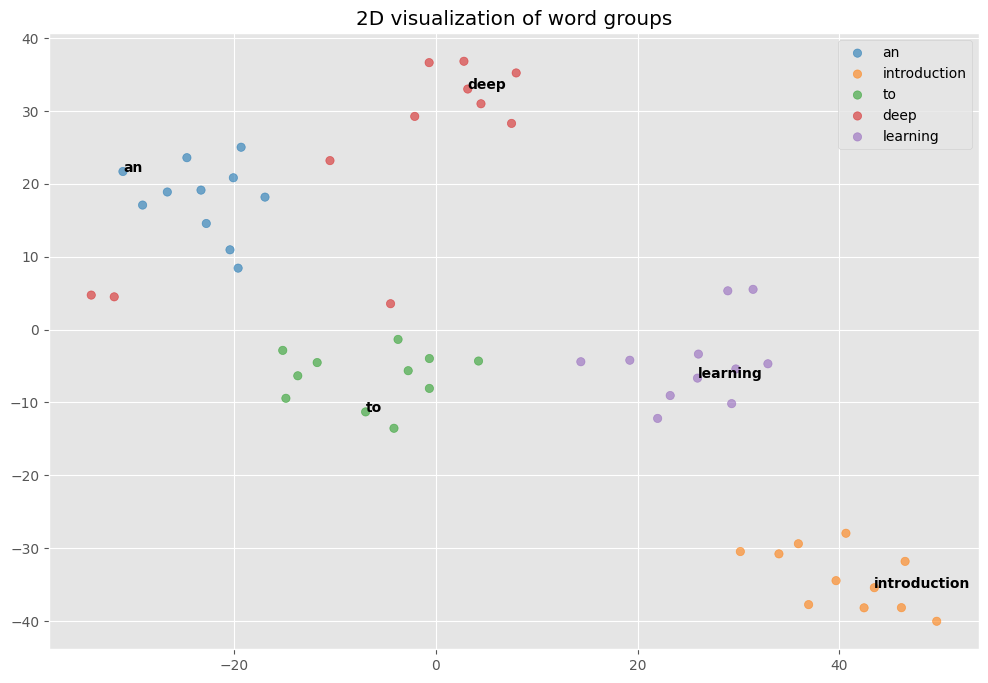

In [51]:
word_list = ['an', 'introduction', 'to', 'deep', 'learning']
plot2D_with_groups(word_list=word_list, k=10, model=word2vect)
#print(a,b)

## <span style="color:#0b486b">Part 2: Text CNN for sequence modeling and neural embedding </span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 10 marks]<span></div>

#### <span style="color:red">**Question 2.1**</span>

**In what follows, you are required to complete the code for Text CNN for sentence classification. The paper of Text CNN can be found at this [link](https://www.aclweb.org/anthology/D14-1181.pdf). Here is the description of the Text CNN that you need to construct.**
- There are three attributes (properties or instance variables): *embed_size, state_size, data_manager*.
  - `embed_size`: the dimension of the vector space for which the words are embedded to using the embedding matrix.
  - `state_size`: the number of filters used in *Conv1D* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)).
  - `data_manager`: the data manager to store information of the dataset.
- The detail of the computational process is as follows:
  - Given input $x$, we embed $x$ using the embedding matrix to obtain an $3D$ tensor $[batch\_size \times maxlen \times embed\_size]$ as $h$.
  - We feed $h$ to three *Conv1D* layers, each of which has $state\_size$ filters, padding=same, activation= relu, and $kernel\_size= 3, 5, 7$ respectively to obtain $h1, h2, h3$. Note that each $h1, h2, h3$ is a 3D tensor with the shape $[batch\_size \times output\_size \times state\_size]$.
  - We then apply *GlobalMaxPool1D()* (reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D)) over $h1, h2, h3$ to obtain 2D tensors stored in $h1, h2, h3$ again.
  - We then concatenate three 2D tensors $h1, h2, h3$ to obtain $h$. Note that you need to specify the axis to concatenate.
  - We finally build up one dense layer on the top of $h$ for classification.
  
  <div style="text-align: right"><span style="color:red">[8 marks]</span></div>
  

In [ ]:
class TextCNN:
    def __init__(self, embed_size= 128, state_size=16, data_manager=None):
        self.data_manager = data_manager
        self.embed_size = embed_size
        self.state_size = state_size

    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.data_manager.vocab_size +1, self.embed_size, mask_zero=True)(x)
        h1 = tf.keras.layers.Conv1D(self.state_size, kernel_size=3, padding='same', activation='relu')(h)#three conv1d layer with kernel_size = 3
        h2 = tf.keras.layers.Conv1D(self.state_size, kernel_size=5, padding='same', activation='relu')(h)#three conv1d layer with kernel_size = 5
        h3 = tf.keras.layers.Conv1D(self.state_size, kernel_size=7, padding='same', activation='relu')(h)#three conv1d layer with kernel_size = 7
        h1 = tf.keras.layers.GlobalMaxPooling1D()(h1)#global pooling
        h2 = tf.keras.layers.GlobalMaxPooling1D()(h2)#global pooling
        h3 = tf.keras.layers.GlobalMaxPooling1D()(h3)#global pooling
        h = h = tf.keras.layers.Concatenate(axis=1)([h1, h2, h3])
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)


#### <span style="color:red">**Question 2.2**</span>
**Here is the code to test TextCNN above. You can observe that TextCNN outperforms the traditional approach Word2Vect with Logistic Regression for this task. The reason is that TextCNN enables us to automatically learn the feature that fits to the task. This makes deep learning different from hand-crafted feature approaches. Complete the code to test the model. Note that when compiling the model, you can use the Adam optimizer.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
text_cnn = TextCNN(data_manager=dm)
text_cnn.build()
# Insert your code here
# You are required to compile the model and train the model on 20 epochs

text_cnn.compile_model(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


text_cnn.fit(dm.train_numeral_data,dm.train_numeral_labels, epochs=20,validation_data=(dm.valid_numeral_data, dm.valid_numeral_labels))


Epoch 1/20
50/50 [==============================] - 3s 42ms/step - loss: 1.5683 - accuracy: 0.4656 - val_loss: 1.2738 - val_accuracy: 0.7350
Epoch 2/20
50/50 [==============================] - 1s 28ms/step - loss: 0.8029 - accuracy: 0.8725 - val_loss: 0.4197 - val_accuracy: 0.9200
Epoch 3/20
50/50 [==============================] - 1s 28ms/step - loss: 0.2232 - accuracy: 0.9594 - val_loss: 0.1785 - val_accuracy: 0.9575
Epoch 4/20
50/50 [==============================] - 2s 37ms/step - loss: 0.0939 - accuracy: 0.9844 - val_loss: 0.1252 - val_accuracy: 0.9600
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.0503 - accuracy: 0.9944 - val_loss: 0.1048 - val_accuracy: 0.9675
Epoch 6/20
50/50 [==============================] - 1s 27ms/step - loss: 0.0293 - accuracy: 0.9987 - val_loss: 0.0920 - val_accuracy: 0.9625
Epoch 7/20
50/50 [==============================] - 1s 28ms/step - loss: 0.0177 - accuracy: 0.9994 - val_loss: 0.0867 - val_accuracy: 0.9650
Epoch 8/20
50

It is observed that the validation accuracy is 0.9675, which is much higher than the validation accuracy in question 1,which is 0.8650

## <span style="color:#0b486b">Part 3: RNN-based models for sequence modeling and neural embedding</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 32 marks]<span></div>

### <span style="color:#0b486b">3.1. RNNs with different cell types</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 marks]<span></div>

#### <span style="color:red">**Question 3.1.1**</span>
**In this part, you need to construct a vanilla RNN to learn from the dataset of interest. Basically, you are required to construct the class RNN with the following requirements:**
- Attribute `data_manager (self.data_manager)`: specifies the data manager used to store data for the model.
- Attribute `cell_type (self.cell_type)`: can take one of the three values, i.e., `simple_rnn`, `gru`, or `lstm` which specifies the memory cells formed a hidden layer.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Note that when declaring an embedding layer for the network, you need to set *mask_zero=True* so that the padding zeros in the sentences will be masked and ignored. This helps to have variable length RNNs. For more detail, you can refer to this [link](https://www.tensorflow.org/guide/keras/masking_and_padding).**

<div style="text-align: right"><span style="color:red">[7 marks]</span></div>

In [4]:
class BaseRNN:
    def __init__(self, cell_type='gru', embed_size=128, state_sizes=[128, 64], data_manager=None):
        self.cell_type = cell_type
        self.state_sizes = state_sizes
        self.embed_size = embed_size
        self.data_manager = data_manager
        self.vocab_size = self.data_manager.vocab_size + 1

    # return the corresponding memory cell
    @staticmethod
    def get_layer(cell_type='gru', state_size=128, return_sequences=False, activation='tanh'):
        if cell_type == 'gru':
            return tf.keras.layers.GRU(state_size,return_sequences=return_sequences,activation=activation)#use gru
        elif cell_type == 'lstm':
            return tf.keras.layers.LSTM(state_size,return_sequences=return_sequences,activation=activation)#use lstm
        else:
            return tf.keras.layers.SimpleRNN(state_size,return_sequences=return_sequences,activation=activation)#use simple rnn

    def build(self):
        x = tf.keras.layers.Input(shape=[None])
        h = tf.keras.layers.Embedding(self.vocab_size,self.embed_size,mask_zero=True)(x)#embedding layer
        num_layers = len(self.state_sizes)#number of layers
        for i in range(num_layers):
            if i==len(self.state_sizes)-1:
              return_sequences=False#if it is the last layer,set return_sequence to be False
            else:
              return_sequences=True#if it is not the last layer,set return_sequence to be True
            h = BaseRNN.get_layer(cell_type=self.cell_type,state_size=self.state_sizes[i],return_sequences=return_sequences)(h)

        if return_sequences:#add one global pooling for the last layer
            h = tf.keras.layers.GlobalMaxPooling1D()(h)
        h = tf.keras.layers.Dense(dm.num_classes, activation='softmax')(h)
        self.model = tf.keras.Model(inputs=x, outputs=h)

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)


#### <span style="color:red">**Question 3.1.2**</span>
**Run with simple RNN ('simple_rnn') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [ ]:
base_rnn = BaseRNN(cell_type='simple_rnn',embed_size=128, state_sizes =[64,128], data_manager=dm)#run with simple rnn and other reequired parameters
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 7s 116ms/step - loss: 0.8925 - accuracy: 0.6950 - val_loss: 0.3078 - val_accuracy: 0.9125
Epoch 2/20
25/25 [==============================] - 2s 98ms/step - loss: 0.1990 - accuracy: 0.9450 - val_loss: 0.2060 - val_accuracy: 0.9375
Epoch 3/20
25/25 [==============================] - 2s 94ms/step - loss: 0.0874 - accuracy: 0.9744 - val_loss: 0.1827 - val_accuracy: 0.9425
Epoch 4/20
25/25 [==============================] - 2s 96ms/step - loss: 0.0862 - accuracy: 0.9725 - val_loss: 0.1111 - val_accuracy: 0.9625
Epoch 5/20
25/25 [==============================] - 3s 116ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.1099 - val_accuracy: 0.9650
Epoch 6/20
25/25 [==============================] - 2s 89ms/step - loss: 0.0338 - accuracy: 0.9900 - val_loss: 0.0897 - val_accuracy: 0.9650
Epoch 7/20
25/25 [==============================] - 2s 80ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 0.0993 - val_accuracy: 0.9650
Epoch 8/20


The observed validation accuracy is 0.97 which is higher than the CNN approach accuaracy

#### <span style="color:red">**Question 3.1.3**</span>
**Run with GRU ('gru') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [ ]:
base_rnn = BaseRNN(cell_type='gru',embed_size=128, state_sizes =[64,128], data_manager=dm)#run with gru,and other required parameters
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 15s 311ms/step - loss: 1.6827 - accuracy: 0.2394 - val_loss: 1.6046 - val_accuracy: 0.2825
Epoch 2/20
25/25 [==============================] - 6s 257ms/step - loss: 1.2741 - accuracy: 0.5056 - val_loss: 0.8565 - val_accuracy: 0.6725
Epoch 3/20
25/25 [==============================] - 6s 234ms/step - loss: 0.5285 - accuracy: 0.8313 - val_loss: 0.3076 - val_accuracy: 0.9250
Epoch 4/20
25/25 [==============================] - 6s 233ms/step - loss: 0.1702 - accuracy: 0.9500 - val_loss: 0.2026 - val_accuracy: 0.9300
Epoch 5/20
25/25 [==============================] - 6s 228ms/step - loss: 0.0888 - accuracy: 0.9744 - val_loss: 0.2001 - val_accuracy: 0.9325
Epoch 6/20
25/25 [==============================] - 7s 269ms/step - loss: 0.0433 - accuracy: 0.9887 - val_loss: 0.1660 - val_accuracy: 0.9425
Epoch 7/20
25/25 [==============================] - 6s 225ms/step - loss: 0.0253 - accuracy: 0.9937 - val_loss: 0.1616 - val_accuracy: 0.9500
Epoch

The observed validation accuracy is 0.96

#### <span style="color:red">**Question 3.1.4**</span>
**Run with LSTM ('lstm') cell with $embed\_size= 128, state\_sizes= [64, 128], data\_manager= dm$.**

<div style="text-align: right"><span style="color:red">[1 mark]</span></div>

In [ ]:
base_rnn = BaseRNN(cell_type='lstm',embed_size=128, state_sizes =[64,128], data_manager=dm)#run with lstm and other required parameters
base_rnn.build()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
base_rnn.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_rnn.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

Epoch 1/20
25/25 [==============================] - 17s 387ms/step - loss: 1.6766 - accuracy: 0.2750 - val_loss: 1.5666 - val_accuracy: 0.2575
Epoch 2/20
25/25 [==============================] - 7s 280ms/step - loss: 1.0719 - accuracy: 0.6556 - val_loss: 0.6007 - val_accuracy: 0.8875
Epoch 3/20
25/25 [==============================] - 8s 341ms/step - loss: 0.3798 - accuracy: 0.9087 - val_loss: 0.2573 - val_accuracy: 0.9275
Epoch 4/20
25/25 [==============================] - 8s 317ms/step - loss: 0.1473 - accuracy: 0.9631 - val_loss: 0.2120 - val_accuracy: 0.9325
Epoch 5/20
25/25 [==============================] - 7s 277ms/step - loss: 0.0893 - accuracy: 0.9750 - val_loss: 0.1286 - val_accuracy: 0.9475
Epoch 6/20
25/25 [==============================] - 7s 262ms/step - loss: 0.0522 - accuracy: 0.9862 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 7/20
25/25 [==============================] - 8s 303ms/step - loss: 0.0385 - accuracy: 0.9912 - val_loss: 0.0963 - val_accuracy: 0.9625
Epoch

The observed validation accuracy is 0.9625

#### <span style="color:red">**Question 3.1.5**</span>
**Write code to conduct experiments to compare the accuracies of RNNs with the three different cell types using 2 different lists of `state_sizes` (while the other hyperparameters are fixed). Specifically, for each `state_sizes = [...]`, you should report the accuracies of RNNs with simple RNN ('simple_rnn') cell, GRU ('gru') cell, and LSTM ('lstm') cell. Give your comments on the results.**
<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [ ]:
# Insert your code here
def experiment(cell_type, state_sizes, epochs=20):#self defined function. input cell_type, state_sizes, return final validation accuracy

    rnn_model = BaseRNN(cell_type=cell_type, embed_size=128, state_sizes=state_sizes, data_manager=dm)
    rnn_model.build()


    opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    rnn_model.compile_model(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = rnn_model.fit(dm.tf_train_set.batch(64), epochs=epochs, validation_data=dm.tf_valid_set.batch(64))


    final_val_accuracy = history.history['val_accuracy'][-1]
    return final_val_accuracy

In [ ]:
cell_types = ['simple_rnn', 'gru', 'lstm']#set up parameters for cell_types
state_sizes_list = [[64, 128], [128, 256]]#set up parameters for state_sizes


results = {}
for state_sizes in state_sizes_list:
    results[str(state_sizes)] = {}
    for cell_type in cell_types:
        val_accuracy = experiment(cell_type, state_sizes)#get accuracy for each parameter combination
        results[str(state_sizes)][cell_type] = val_accuracy
        print(f"Validation accuracy for {cell_type} with state sizes {state_sizes}: {val_accuracy:.4f}")


Epoch 1/20
25/25 [==============================] - 4s 100ms/step - loss: 0.8660 - accuracy: 0.7050 - val_loss: 0.2734 - val_accuracy: 0.9275
Epoch 2/20
25/25 [==============================] - 2s 79ms/step - loss: 0.1987 - accuracy: 0.9469 - val_loss: 0.1721 - val_accuracy: 0.9450
Epoch 3/20
25/25 [==============================] - 2s 82ms/step - loss: 0.1024 - accuracy: 0.9694 - val_loss: 0.3464 - val_accuracy: 0.8700
Epoch 4/20
25/25 [==============================] - 3s 114ms/step - loss: 0.0608 - accuracy: 0.9794 - val_loss: 0.1347 - val_accuracy: 0.9550
Epoch 5/20
25/25 [==============================] - 2s 84ms/step - loss: 0.0263 - accuracy: 0.9937 - val_loss: 0.1369 - val_accuracy: 0.9575
Epoch 6/20
25/25 [==============================] - 2s 88ms/step - loss: 0.0462 - accuracy: 0.9875 - val_loss: 0.1095 - val_accuracy: 0.9575
Epoch 7/20
25/25 [==============================] - 2s 84ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.1152 - val_accuracy: 0.9650
Epoch 8/20


\# Give your comments on the results here (maximum 150 words)

results:
Validation accuracy for simple_rnn with state sizes [64, 128]: 0.9625
Validation accuracy for simple_rnn with state sizes [128, 256]: 0.9725

Validation accuracy for gru with state sizes [64, 128]: 0.9525
Validation accuracy for gru with state sizes [128, 256]: 0.9575

Validation accuracy for lstm with state sizes [64, 128]: 0.9500
Validation accuracy for lstm with state sizes [128, 256]: 0.9725

It is observed that increasing the state size can increase the validation accuracy.
And among the three cell_type, the simple_rnn works the best


### <span style="color:#0b486b">3.2. RNNs with fine-tuning embedding matrix</span> ###

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 8 marks]<span></div>

#### <span style="color:red">**Question 3.2.1**</span>

**In what follows, you are required to extend the class BaseRNN in Part 3.1 to achieve a class RNN in which the embedding matrix can be initialized using a pretrained Word2Vect.**

**Below are the descriptions of the attributes of the class *RNN*:**
- `run_mode (self.run_mode)` has three values (scratch, init-only, and init-fine-tune).
  - `scratch` means training the embedding matrix from scratch.
  - `init-only` means only initializing the embedding matrix with a pretrained Word2Vect but **not further doing** fine-tuning that matrix.
  - `init-fine-tune` means both initializing the embedding matrix with a pretrained Word2Vect and **further doing** fine-tuning that matrix.
- `cell_type (self.cell_type)` has three values (simple-rnn, gru, and lstm) which specify the memory cell used in the network.
- `embed_model (self.embed_model)` specifes the pretrained Word2Vect model used.
-  `embed_size (self.embed_size)` specifes the embedding size. Note that when run_mode is either 'init-only' or 'init-fine-tune', this embedding size is extracted from embed_model for dimension compatability.
- `state_sizes (self.state_sizes)` indicates the list of the hidden sizes  of memory cells. For example, $state\_sizes = [64, 128]$ means that you have two hidden layers in your network with hidden sizes of $64$ and $128$ respectively.

**Complete the code of the class *RNN*.**

<div style="text-align: right"><span style="color:red">[6 marks]</span></div>

In [5]:
class RNN(BaseRNN):
    def __init__(self, run_mode='scratch', embed_model='glove-wiki-gigaword-100', **kwargs):
        super().__init__(**kwargs)
        self.run_mode = run_mode
        self.embed_model = embed_model
        if self.run_mode != 'scratch':
            self.embed_size = int(self.embed_model.split("-")[-1])
        self.word2idx = dm.word2idx
        self.word2vect = None
        self.embed_matrix = np.zeros(shape=[self.vocab_size, self.embed_size])

    def build_embedding_matrix(self):
        if self.run_mode != 'scratch':#if run mode is not scratch
          self.word2vect = api.load(self.embed_model)#initialize pretrained model
          for word, idx in self.word2idx.items():
            try:
              self.embed_matrix[idx]=self.word2vect[word]#assign value for the embeding matrix
            except KeyError:
              pass


    def build(self):
        x = tf.keras.layers.Input(shape=[None])

        em_init = 'uniform'# default for embeding initializer
        em_trainable = True# if embeding is trainable

        if self.run_mode != 'scratch':
          self.build_embedding_matrix()
          em_init = tf.keras.initializers.Constant(self.embed_matrix)
          if self.run_mode == 'init-fine-tune':#if init-fine-tune, then embeding is trainable
            em_trainable=True
          else:
            em_trainable=False#for init-only

        h = tf.keras.layers.Embedding(self.vocab_size,self.embed_size,embeddings_initializer = em_init,trainable=em_trainable,mask_zero=True)(x)#embeding layer

        num_layers = len(self.state_sizes)#number of layers
        for i in range(num_layers):
          if i< len(self.state_sizes) -1:
            return_sequences = True#if not the last layer, return sequence is true
          else:
            return_sequences=False#if the last layer, return sequence is false
          h = self.get_layer(cell_type=self.cell_type, state_size=self.state_sizes[i],return_sequences=return_sequences)(h)

        if return_sequences:
          h = tf.keras.layers.GlobalMaxPooling1D()(h)#global pooling

        h=tf.keras.layers.Dense(self.data_manager.num_classes,activation='softmax')(h)#feed to the dense layer
        self.model = tf.keras.Model(inputs=x,outputs=h)




    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        self.model.evaluate(*args, **kwargs)

#### <span style="color:red">**Question 3.2.2**</span>

**Write code to conduct experiments to compare three running modes for the embedding matrix. Note that you should stick with fixed values for other attributes and only vary *run_mode*. Give your comments on the results.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

In [59]:
import tensorflow as tf

cell_type = 'simple_rnn'#consist with the best parameters found previously
embed_size = 128
state_sizes = [128, 256]
epochs = 20
batch_size = 64

modes = ['scratch', 'init-only', 'init-fine-tune']
results = {}

def one_hot_encode(labels, num_classes):
    return tf.keras.utils.to_categorical(labels, num_classes=num_classes)

num_classes = 6
train_labels_hot = one_hot_encode(dm.train_numeral_labels, num_classes)
valid_labels_hot = one_hot_encode(dm.valid_numeral_labels, num_classes)

for mode in modes:
    print(f"Training RNN with run_mode: {mode}")


    rnn = RNN(run_mode=mode, cell_type=cell_type, embed_size=embed_size, state_sizes=state_sizes, data_manager=dm)
    rnn.build()
    rnn.compile_model(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = rnn.fit(dm.train_numeral_data, train_labels_hot, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # somehow, save_model methods have some error so rebuild the model and load the weight. The benefit is
    # that if the code corupts, I still have the model weight and do not need to rerun the whole code.
    rnn.model.save_weights(f"rnn_model_weights_{mode}.h5")
    rnn2 = RNN(run_mode=mode, cell_type=cell_type, embed_size=embed_size, state_sizes=state_sizes, data_manager=dm)
    rnn2.build()
    rnn2.compile_model(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    rnn2.model.load_weights(f"rnn_model_weights_{mode}.h5")

    # for evaluation
    evaluation = rnn2.model.evaluate(dm.valid_numeral_data, valid_labels_hot)
    results[mode] = {
        'history': history.history,
        'evaluation': evaluation
    }


Training RNN with run_mode: scratch
Epoch 1/20
20/20 [==============================] - 9s 298ms/step - loss: 1.0148 - accuracy: 0.6148 - val_loss: 0.2599 - val_accuracy: 0.9156
Epoch 2/20
20/20 [==============================] - 5s 269ms/step - loss: 0.1870 - accuracy: 0.9430 - val_loss: 0.2862 - val_accuracy: 0.9062
Epoch 3/20
20/20 [==============================] - 6s 316ms/step - loss: 0.1119 - accuracy: 0.9695 - val_loss: 0.1208 - val_accuracy: 0.9594
Epoch 4/20
20/20 [==============================] - 5s 254ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.1121 - val_accuracy: 0.9594
Epoch 5/20
20/20 [==============================] - 7s 349ms/step - loss: 0.0481 - accuracy: 0.9875 - val_loss: 0.1032 - val_accuracy: 0.9656
Epoch 6/20
20/20 [==============================] - 5s 265ms/step - loss: 0.0565 - accuracy: 0.9883 - val_loss: 0.1232 - val_accuracy: 0.9594
Epoch 7/20
20/20 [==============================] - 7s 341ms/step - loss: 0.0983 - accuracy: 0.9727 - val_loss: 

In [60]:
print(results)

{'scratch': {'history': {'loss': [1.0147818326950073, 0.18696120381355286, 0.1119476705789566, 0.058542393147945404, 0.04806692153215408, 0.05648744851350784, 0.0983356311917305, 0.06510436534881592, 0.07952382415533066, 0.04898275062441826, 0.15142610669136047, 0.22210855782032013, 0.035458680242300034, 0.02086576260626316, 0.011455336585640907, 0.008313080295920372, 0.0019136365735903382, 0.0014107184251770377, 0.0011570334900170565, 0.000992060056887567], 'accuracy': [0.6148437261581421, 0.9429687261581421, 0.969531238079071, 0.9820312261581421, 0.987500011920929, 0.98828125, 0.97265625, 0.9820312261581421, 0.98828125, 0.991406261920929, 0.964062511920929, 0.934374988079071, 0.991406261920929, 0.9945312738418579, 0.996874988079071, 0.999218761920929, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.25987666845321655, 0.28616827726364136, 0.1208275705575943, 0.1121082678437233, 0.10322685539722443, 0.12324869632720947, 0.2458362579345703, 0.1471322476863861, 0.12969358265399933, 0.183600157499313

\# Give your comments on the results here (maximum 150 words)

The result:
as shown in the above evalution results:
for scratch the accuracy is 0.9625
for init-only the accuracy is 0.94
for init-fine-tune the accuary is 0.9625

the other parameter chosen are:
cell_type = 'simple_rnn'
embed_size = 128  
state_sizes = [128, 256]
epochs = 20  
batch_size = 64  

which is found in the q3.1.5

I was expecting the accuracy for init-fine-tune to be higher than scratch but it turns out the accuracy for scratch and init-fine-tune are almost the same

### <span style="color:#0b486b">3.3. RNNs with Attention for Text and Sequence Classification</span> ###

**In what follows, you are required to implement a RNN with the attention mechanism for text and sequence classification. This attention mechanism is applied at the last hidden layer of our RNN. Specifically, let $\textbf{h}_1^L, \textbf{h}_2^L,...,\textbf{h}_{T-1}^L, \textbf{h}_T^L$ be the hidden states at the last hidden layer $L$ where $T$ is the sequence length. We compute the context vector $\textbf{c}$ as $\textbf{c}=\sum_{i=1}^{T}\textbf{a}_{i}\textbf{h}_{i}^L$ where $\textbf{a}_1,...,\textbf{a}_T$ are the alignment weights (i.e., $\textbf{a}_i\geq 0$ and $\sum_{i=1}^{T}\textbf{a}_{i}=1$).**

**The alignment weights are computed as follows:**
- $\textbf{a}=[\textbf{a}_{i}]_{i=1}^{T}=\text{softmax}(\textbf{s})$ where $\textbf{s}= [\textbf{s}_{i}]_{i=1}^{T}$ consists of the alignment scores.
- The alignment scores are computed as $\textbf{s}=\text{tanh}(\textbf{h}^LU)V$ where $\textbf{h}^L=\left[\begin{array}{c}
\textbf{h}_{1}^L\\
\textbf{h}_{2}^L\\
...\\
\textbf{h}_{T-1}^L\\
\textbf{h}_{T}^L
\end{array}\right]\in\mathbb{R}^{T\times state\_size_{L}}$, $U\in\mathbb{R}^{state\_size_{L}\times output\_length}$, $V\in\mathbb{R}^{output\_length\times1}$, and $output\_length$ is a hyperparameter. Note that if we consider a mini-batch, the shape of $\textbf{h}^L$ is $(batch\_size, T, state\_size_L)$ where $state\_size_L$ is the hidden size of the last hidden layer. The figure on the right below illustrates the process of calculating a score $\textbf{s}_i$ for an individual hidden state $\textbf{h}_i^L$. Weight matrices $U$ and $V$ are shared across the hidden states $\textbf{h}_1^L,\textbf{h}_2^L,\dots,\textbf{h}_T^L$.

**After having the context vector $\textbf{c}$, we concatenate with the last hidden state $\textbf{h}_T^L$. On top of this concatenation, we conduct the output layer with the softmax activation.**

<img src="./images/attentionRNN.png" align="center" width=700/>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 12 marks]<span></div>

#### <span style="color:red">**Question 3.3.1**</span>

**We declare the  layer `MyAttention` as a class inherited from `tf.keras.layers.Layer` to realize our attention mechanism. You are required to provide the code for this class. Note that in the `def call(self, all_states, last_state)` method, `all_states` is the collection of all hidden states and `last_state` is the last hidden state.**

<div style="text-align: right"><span style="color:red">[4 marks]</span></div>

In [ ]:
import tensorflow as tf

class MyAttention(tf.keras.layers.Layer):
    def __init__(self, output_length=50):
        super().__init__()
        self.output_length = output_length

    def build(self, input_shape):#initialize U V as required in the question
        self.U = self.add_weight(shape=(input_shape[-1], self.output_length), initializer="random_normal", trainable=True)
        self.V = self.add_weight(shape=(self.output_length, 1), initializer="random_normal", trainable=True)

    def call(self, all_states, last_state):
        s = tf.tanh(tf.matmul(all_states, self.U)) #s = tanh(hL*U)
        scores = tf.matmul(s, self.V)# scores which is s, score = s*V as required in the question

        alignment_weights = tf.nn.softmax(scores, axis=1)#which is a in the question
        context_vector = tf.reduce_sum(alignment_weights * all_states, axis=1)#which is c in the question
        return tf.concat([context_vector, last_state], axis=-1)#concanate

#### <span style="color:red">**Question 3.3.2**</span>

**You are required to extend the class `RNN` in Question `3.2.1` to achieve the class `AttentionRNN` in which the attention mechanism mentioned above is applied at the last hidden layer.**

<div style="text-align: right"><span style="color:red">[6 marks]</span></div>

In [6]:
class AttentionRNN(RNN):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    @staticmethod
    def get_layer(cell_type='gru', state_size=128, return_sequences=False, activation='tanh'):#the code for chosing gru/lstm/simple-rnn

        if cell_type == 'gru':# for 'gru'
            return tf.keras.layers.GRU(state_size, return_sequences=return_sequences, activation=activation)
        elif cell_type == 'lstm':# for 'lstm'
            return tf.keras.layers.LSTM(state_size, return_sequences=return_sequences, activation=activation)
        elif cell_type == 'simple_rnn':#for 'simple-rnn'
            return tf.keras.layers.SimpleRNN(state_size, return_sequences=return_sequences, activation=activation)
        else:#for others in case
            raise ValueError(f"Unsupported cell type: {cell_type}")

    def compile_model(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)

    def evaluate(self, *args, **kwargs):
        return self.model.evaluate(*args, **kwargs)

    def build(self):
        x = tf.keras.layers.Input(shape=[None])

        em_init = 'uniform' # default for embedding initializer
        em_trainable = True# if embeding is trainable

        if self.run_mode != 'scratch':
            self.build_embedding_matrix()
            em_init = tf.keras.initializers.Constant(self.embed_matrix)
            if self.run_mode == 'init-fine-tune':
                em_trainable = True#for init-fine-tune
            else:
                em_trainable = False#for init-only

        h = tf.keras.layers.Embedding(self.vocab_size, self.embed_size, embeddings_initializer=em_init, trainable=em_trainable, mask_zero=True)(x)

        num_layers = len(self.state_sizes)
        for i in range(num_layers):
            if i < len(self.state_sizes) - 1:#if not the last layer
                return_sequences = True
            else:
                return_sequences = True  #change to true because one more attention layer
            h = self.get_layer(cell_type=self.cell_type, state_size=self.state_sizes[i], return_sequences=return_sequences)(h)

        # attention layer
        all_states = h
        last_state = tf.keras.layers.Lambda(lambda x: x[:, -1, :])(h)#get the last state
        context_vector = MyAttention()(all_states, last_state)

        # concatenate context vector with the last state
        combined_vector = tf.keras.layers.Concatenate(axis=-1)([context_vector, last_state])

        # feed the combined vector to the Dense layer
        h = tf.keras.layers.Dense(self.data_manager.num_classes, activation='softmax')(combined_vector)

        self.model = tf.keras.Model(inputs=x, outputs=h)



#### <span style="color:red">**Question 3.3.3**</span>

**Choose a common setting for standard RNN and RNN with attention and conduct experiments to compare them. The setting here means `run_mode`, `cell_type` and list of `state_sizes`. Give your comments on the results.**

<div style="text-align: right"><span style="color:red">[2 marks]</span></div>

\# Give your comments on the results here (maximum 150 words)

In [17]:
#some self-defined valuables, functions i need for the following experiment
num_classes = 6

def one_hot_encode(labels, num_classes):
    return tf.keras.utils.to_categorical(labels, num_classes=num_classes)

train_labels_hot = one_hot_encode(dm.train_numeral_labels, num_classes)
valid_labels_hot = one_hot_encode(dm.valid_numeral_labels, num_classes)





In [16]:
#experiment to see comparasion
modes = ['init-only', 'init-fine-tune']
cell_types = ['simple_rnn', 'gru', 'lstm']

for mode in modes:
  for cell_type in cell_types:


    print(f"rnn attention with {mode} and {cell_type}")
    attention_rnn = AttentionRNN(run_mode=mode, cell_type=cell_type, state_sizes=[128, 256], data_manager=dm)
    attention_rnn.build()
    attention_rnn.compile_model(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_attention_rnn = attention_rnn.fit(dm.train_numeral_data, train_labels_hot, epochs=20, batch_size=64, validation_split=0.2)
    evaluation_attention_rnn = attention_rnn.evaluate(dm.valid_numeral_data, valid_labels_hot)

rnn attention with init-only and simple_rnn
[==================================================] 100.0% 128.1/128.1MB downloaded
Epoch 1/20
20/20 [==============================] - 12s 381ms/step - loss: 1.3019 - accuracy: 0.4711 - val_loss: 0.7506 - val_accuracy: 0.7312
Epoch 2/20
20/20 [==============================] - 6s 282ms/step - loss: 0.4267 - accuracy: 0.8500 - val_loss: 0.2475 - val_accuracy: 0.9187
Epoch 3/20
20/20 [==============================] - 7s 368ms/step - loss: 0.1713 - accuracy: 0.9391 - val_loss: 0.1776 - val_accuracy: 0.9406
Epoch 4/20
20/20 [==============================] - 6s 283ms/step - loss: 0.1228 - accuracy: 0.9609 - val_loss: 0.1350 - val_accuracy: 0.9500
Epoch 5/20
20/20 [==============================] - 7s 371ms/step - loss: 0.1107 - accuracy: 0.9664 - val_loss: 0.2754 - val_accuracy: 0.9156
Epoch 6/20
20/20 [==============================] - 6s 295ms/step - loss: 0.1177 - accuracy: 0.9648 - val_loss: 0.1311 - val_accuracy: 0.9563
Epoch 7/20
20/20 [

It is observed that the validation accuracy for attention with init-only and simple-rnn is 0.9575
with init-only and gru is 0.97
with init-only and lstm is 0.9725
with fine-tune and simple-rnn is 0.96
with fine-tune and gru is 0.9675
with fine-tune and lstm is 0.9725


compared with standard rnn:
for scratch the accuracy is 0.9625 for init-only the accuracy is 0.94 for init-fine-tune the accuary is 0.9625 when choosing cell_type = 'simple_rnn'

the accuracy improves noticably.

Interestingly, for standard rnn, simple-rnn works the best. in the attention version, lstm works the best

## <span style="color:#0b486b">Part 4: Transformer-based models for sequence modeling and neural embedding and the overall ranking</span>

<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 23 marks]<span></div>

#### <span style="color:red">**Question 4.1**</span>

**Implement the multi-head attention module of the Transformer for the text classification problem. The provided code is from [this source](https://keras.io/examples/nlp/text_classification_with_transformer/). In this part, we only use the output of the Transformer encoder for the classification task. For further information on the Transformer model, refer to [this paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf).**

<div style="text-align: right"><span style="color:red">[11 marks]</span></div>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class MultiHeadAttention(layers.Layer):
    # Insert your code here

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = # Insert your code here to call 'MultiHeadAttention' class
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dropout, Dense
from tensorflow.keras.models import Sequential

vocab_size = dm.vocab_size + 1
maxlen = dm.maxlen

def create_tfm_model(embed_dim=64, num_heads=8, ff_dim=32, dropout_rate=0.1):
    """
    Creates a Transformer model using the given hyperparameters.

    Parameters:
        embed_dim (int): The embedding dimension for each token.
        num_heads (int): The number of attention heads in the multi-head attention layer.
        ff_dim (int): The hidden layer size in the feed forward network inside the transformer block.
        dropout_rate (float): The dropout rate for regularization.
    Returns:
        keras.models.Sequential: A Transformer model.
    """
    tfm = Sequential()
    tfm.add(Input(shape=(maxlen,)))
    tfm.add(TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim))
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)
    tfm.add(transformer_block)
    tfm.add(GlobalAveragePooling1D())
    tfm.add(Dropout(dropout_rate))
    tfm.add(Dense(units=dm.num_classes, activation='softmax'))
    tfm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return tfm

In [ ]:
model = create_tfm_model()
model.fit(dm.tf_train_set.batch(64), epochs=20, validation_data=dm.tf_valid_set.batch(64))

#### <span style="color:red">**Question 4.2**</span>
**Write code to conduct experiments to evaluate the impact of hyperparameters `embed_dim`, `num_heads`, `ff_dim`, and `dropout_rate` of the Transformer model on the accuracy. Report (i) your findings from the experiments, (ii) the accuracy of your best Transformer model (i.e., the one with the highest accuracy on the validation set), and (iii) the values of the mentioned hyperparameters of that best model.  
Note that the necessary condition to get the full mark for this question is that the accuracy of your best Transformer model should be at least 90%.**
<div style="text-align: right"><span style="color:red">[3 marks]</span></div>

In [ ]:
# Insert your code here

\# Give your answer here.

(i) Your findings from the experiments (maximum 200 words)

(ii) The accuracy of your best Transformer model on the validation set

(iii) The values of the mentioned hyperparameters of your best Transformer model

#### <span style="color:red">**Question 4.3**</span>
**For any models defined in the previous questions (of all parts), you are free to fine-tune hyperparameters, e.g., `optimizer`, `learning_rate`, `state_sizes`, such that you get a best model, i.e., the one with the highest accuracy on the validation set. You will need to report (i) what is your best model,  (ii) its accuracy on the validation set, and (iii) the values of its hyperparameters. Note that you must report your best model's accuracy with rounding to 4 decimal places, i.e., 0.xxxx. You will also need to upload your best model (or provide us with the link to download your best model). The assessment will be based on your best model's accuracy, with up to 9 marks available, specifically:**
* The best accuracy $\ge$ 0.98: 9 marks
* 0.98 $>$ The best accuracy $\ge$ 0.92: 6 marks
* 0.92 $>$ The best accuracy $\ge$ 0.85: 3 marks
* The best accuracy $<$ 0.85: 0 mark
<div style="text-align: right"><span style="color:red">[9 marks]</span></div>

\# Give your answer here.

(i) What is your best model?

(ii) The accuracy of your best model on the validation set

(iii) The values of the hyperparameters of your best model

(iv) The link to download your best model

---
<div style="text-align: center"> <span style="color:green">GOOD LUCK WITH YOUR ASSIGNMENT 2!</span> </div>
<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>

(i) the model i found so far is the attention version rnn with "init-fine-tune" and "lstm"

(ii)the model accuracy is 0.9675.
0.9750(the second time i run it)

(iii) best parameter :
embed_size = 128  
state_sizes = [128, 256]
epochs = 20  
batch_size = 64  
(iv) the model is included in the zip called "best_model_A2.keras"



Note: accuracy can also be seen in the following result.


In [21]:
attention_rnn = AttentionRNN(run_mode='init-fine-tune', cell_type='lstm', state_sizes=[128, 256], data_manager=dm)
attention_rnn.build()
attention_rnn.compile_model(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_attention_rnn = attention_rnn.fit(dm.train_numeral_data, train_labels_hot, epochs=20, batch_size=64, validation_split=0.2)
evaluation_attention_rnn = attention_rnn.evaluate(dm.valid_numeral_data, valid_labels_hot)


Epoch 1/20
20/20 [==============================] - 35s 1s/step - loss: 1.2533 - accuracy: 0.5227 - val_loss: 0.7188 - val_accuracy: 0.7719
Epoch 2/20
20/20 [==============================] - 30s 2s/step - loss: 0.3751 - accuracy: 0.8883 - val_loss: 0.3073 - val_accuracy: 0.9219
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 0.1793 - accuracy: 0.9453 - val_loss: 0.2260 - val_accuracy: 0.9438
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 0.0906 - accuracy: 0.9758 - val_loss: 0.1703 - val_accuracy: 0.9563
Epoch 5/20
20/20 [==============================] - 20s 1s/step - loss: 0.0739 - accuracy: 0.9789 - val_loss: 0.1066 - val_accuracy: 0.9688
Epoch 6/20
20/20 [==============================] - 19s 952ms/step - loss: 0.0800 - accuracy: 0.9766 - val_loss: 0.1317 - val_accuracy: 0.9563
Epoch 7/20
20/20 [==============================] - 21s 1s/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.0944 - val_accuracy: 0.9656
Epoch 8/20
20/20 

In [20]:
model_save_path = "best_model_A2.keras"


import os
if os.path.exists(model_save_path):
    os.remove(model_save_path)

attention_rnn.model.save(model_save_path)


In [22]:
!jupyter nbconvert --to html A2_Section2_Solution.ipynb

[NbConvertApp] Converting notebook A2_Section2_Solution.ipynb to html
[NbConvertApp] Writing 1037699 bytes to A2_Section2_Solution.html
